# Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Load the cleaned dataset

In [4]:
df = pd.read_csv("Cleaned_fitness_classes_data.csv")
print(df['End_Date'].head())


0     8-Apr-18
1    15-Apr-18
2    22-Apr-18
3    29-Apr-18
4     6-May-18
Name: End_Date, dtype: object


# Step 3: Convert End_Date to datetime and sort data

In [5]:
df['End_Date'] = pd.to_datetime(df['End_Date'], format='%d-%b-%y')
df = df.sort_values(by='End_Date')

# Step 4: Extract time-based features

In [6]:
df['Year'] = df['End_Date'].dt.year
df['Month'] = df['End_Date'].dt.month
df['Week'] = df['End_Date'].dt.isocalendar().week
df['Weekday'] = df['End_Date'].dt.day_name()

# Step 5: Feature Engineering

In [7]:
# We'll use 'Price_INR', 'Capacity', 'Hour', 'Capacity_Utilization', 'Month', 'Week' and 'Weekday' as features
# Encode 'Weekday' using one-hot encoding
df = pd.get_dummies(df, columns=['Weekday'], drop_first=True)

# Step 6: Define target variable and features

In [15]:

X = df.drop(columns=['Site_ID', 'Class_Name', 'End_Date', 'Start_Time', 'End_DateTime', 
                     'Booked', 'Revenue', 'MaxBookes'])
y = df['Booked']

# Ensure only numeric columns are used for RandomForest
X = X.select_dtypes(include=[np.number])

# Fill any missing values (if present)
X = X.fillna(0)
y = y.fillna(0)

# Step 7: Split data into train and test sets (80-20 split), keeping chronological order

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Initialize and train the model

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Step 9: Make predictions

In [18]:
y_pred = model.predict(X_test)

# Step 10: Evaluate the model

In [19]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.07
Root Mean Squared Error (RMSE): 0.25


# Step 10: Visualize actual vs predicted demand

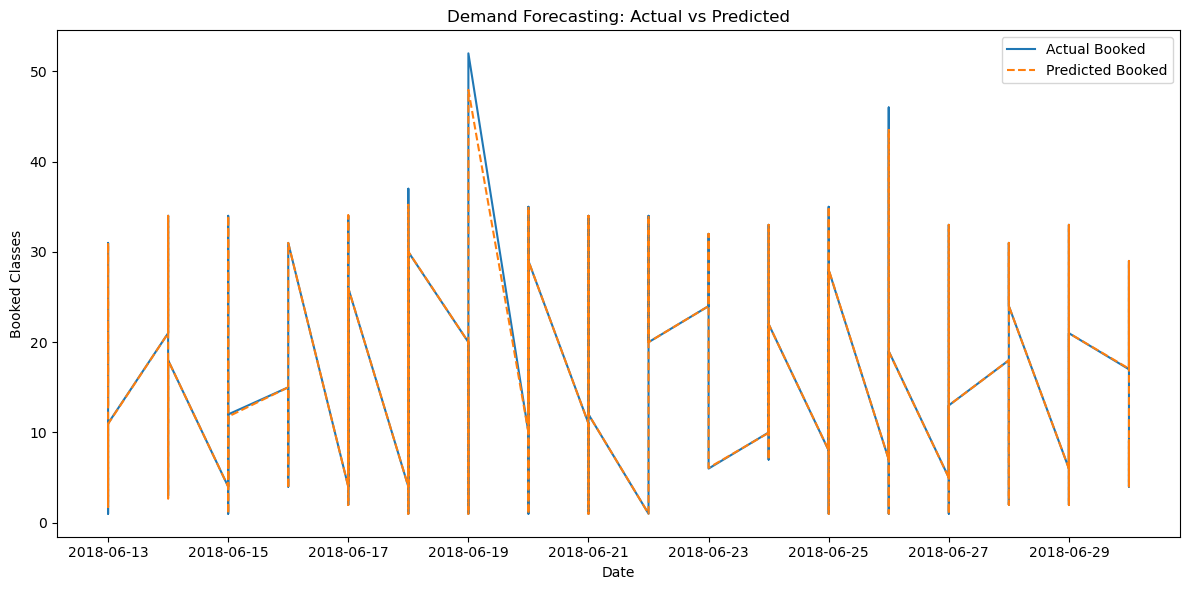

In [20]:
# Ensure dates align with test set
test_dates = df['End_Date'].iloc[len(X_train):len(X_train)+len(X_test)]

plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test.values, label="Actual Booked")
plt.plot(test_dates, y_pred, label="Predicted Booked", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Booked Classes")
plt.title("Demand Forecasting: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()